Your Full Name: 
    
`Arindam Choudhury`

    Nutan Mandale
    
    Humberto Gonzalez Granda

Your Uplevel Email Address:
    
    arindam.choudhury.email@gmail.com
    
    nutan.mandale@gmail.com
    
    HumbertoGonzalezGranda@gmail.com

Name of the Problem Statement of Submission:
    
    ShopTalk (Project-6)

In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import requests
from io import BytesIO
from dotenv import load_dotenv
load_dotenv()

True

#### S3 Bucket name

In [2]:
load_dotenv()
ABO_BUCKET_NAME:      str = os.getenv("ABO_BUCKET_NAME")
YOUR_S3_BUCKET_NAME:  str = os.getenv("YOUR_S3_BUCKET_NAME")
ARTIFACTS_FOLDER:     str = os.getenv("ARTIFACTS_FOLDER")
EDA_FOLDER_NAME:      str = os.getenv("EDA_FOLDER_NAME")

#### Get the JSON file created in 1.

In [3]:
json_path = f"s3://{YOUR_S3_BUCKET_NAME}/{EDA_FOLDER_NAME}/dataset.json"
dataset = pd.read_json(json_path)

In [4]:
dataset.columns # listing columns

Index(['item_id', 'product_type', 'other_image_id', 'country', 'marketplace',
       'domain_name', 'color_code', 'spin_id', '3dmodel_id', 'brand_in_en_us',
       'bullet_point_in_en_us', 'color_in_en_us', 'fabric_type_in_en_us',
       'finish_type_in_en_us', 'item_keywords_in_en_us', 'item_name_in_en_us',
       'item_shape_in_en_us', 'material_in_en_us', 'model_name_in_en_us',
       'pattern_in_en_us', 'product_description_in_en_us', 'height', 'width',
       'path', 'other_image_id_path'],
      dtype='object')

#### Create a function to display the image from index number

In [5]:
image_folder_path = f"s3://{ABO_BUCKET_NAME}/abo-images-small/images/small/"
image_url_path    = f"https://{ABO_BUCKET_NAME}.s3.amazonaws.com/images/small/"

In [6]:
def display_image_with_index(display_image_index):
    url = image_url_path + dataset["path"][display_image_index]
    response = requests.get(url)
    image_pil = Image.open(BytesIO(response.content)).convert('RGB')
    print("Image Info: ", image_pil.format, image_pil.size, image_pil.mode) # (width, height) ; shape is not valid
    plt.figure(figsize = (25,1))
    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

Image Info:  None (256, 256) RGB


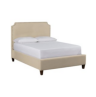

In [7]:
display_image_with_index(22)

#### Create a function to display the image from item number

In [8]:
def display_image_with_item(item_id):
    path = dataset[dataset["item_id"] == item_id]["path"].to_list()[0]
    item_desc = dataset[dataset["item_id"] == item_id]["item_name_in_en_us"].to_list()[0]
    url = image_url_path + path
    response = requests.get(url)
    image_pil = Image.open(BytesIO(response.content)).convert('RGB')
    print("Image Desc: ", item_desc)
    print("Image path: ", path)
    plt.figure(figsize = (25,1))
    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

Image Desc:  Arizona Desert Sand Horizon Photo with Wood Hanger
Image path:  c6/c6889ed4.jpg


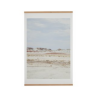

In [9]:
item_id = "B075DQBBJZ"
display_image_with_item(item_id)

#### Create a function to display the more images of an item

In [10]:
def get_image(path):
    url = image_url_path + path
    response = requests.get(url)
    image_pil = Image.open(BytesIO(response.content)).convert('RGB')
    return image_pil

Main Item Image:  B075DQBBJZ
Image Desc:  Arizona Desert Sand Horizon Photo with Wood Hanger
Image path:  c6/c6889ed4.jpg


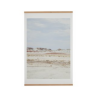

More Images of the item:  B075DQBBJZ


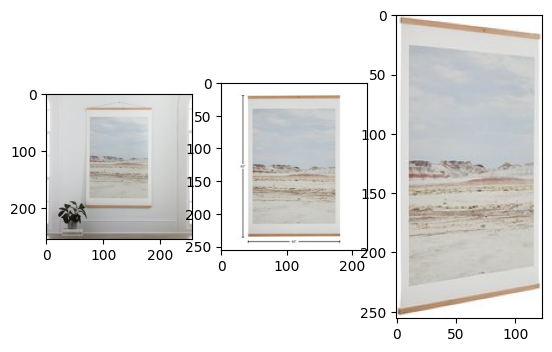

In [11]:
print("Main Item Image: ", item_id)
display_image_with_item(item_id)

print("More Images of the item: ", item_id)
more_images_paths = dataset[dataset["item_id"] == item_id]["other_image_id_path"].to_list()[0]
more_images = []
for more_images_path in more_images_paths:
    image_pil = get_image(more_images_path)
    more_images.append(image_pil)
total = len(more_images)
for i, images in enumerate(more_images):
    plt.subplot(1, total, i+1)
    plt.imshow(images)